In [1]:
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import kurtosis,skew
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import warnings
warnings.filterwarnings('ignore') 

In [2]:
df = pd.read_csv('C:\\Users\\mps\\OneDrive - University of Waterloo\\Documents\\Assignment 657\\Heart\\Kaggle Heart\\train.csv')
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,76,0,2,140.102822,197.105970,0,2.0,115.952071,0,1.284822,1.0,0,2.175904,1
1,43,0,0,132.079599,341.049462,1,0.0,135.970028,1,3.110483,1.0,0,3.082071,0
2,47,1,2,107.899290,242.822816,0,1.0,152.210039,0,-0.023723,2.0,0,2.020827,0
3,51,1,2,99.934001,NaN,0,1.0,143.049207,1,1.195082,1.0,0,2.100312,1
4,57,1,0,110.103508,334.952353,0,1.0,143.099327,1,3.082052,1.0,1,2.831509,0


In [3]:
df.shape

(212, 14)

In [4]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps    float64
chol        float64
fbs           int64
restecg     float64
thalach     float64
exang         int64
oldpeak     float64
slope       float64
ca            int64
thal        float64
target        int64
dtype: object

In [5]:
df1=df.round({'thal': 0,'chol': 0,'trestbps': 0,'thalach': 0,'oldpeak': 0})
df1

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,76,0,2,140.0,197.0,0,2.0,116.0,0,1.0,1.0,0,2.0,1
1,43,0,0,132.0,341.0,1,0.0,136.0,1,3.0,1.0,0,3.0,0
2,47,1,2,108.0,243.0,0,1.0,152.0,0,-0.0,2.0,0,2.0,0
3,51,1,2,100.0,NaN,0,1.0,143.0,1,1.0,1.0,0,2.0,1
4,57,1,0,110.0,335.0,0,1.0,143.0,1,3.0,1.0,1,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,56,1,2,NaN,256.0,1,0.0,142.0,1,1.0,1.0,1,1.0,0
208,57,0,0,128.0,303.0,0,0.0,159.0,0,NaN,2.0,1,2.0,1
209,54,1,2,150.0,232.0,0,0.0,165.0,0,2.0,2.0,0,3.0,1
210,41,1,2,130.0,214.0,0,0.0,168.0,0,2.0,1.0,0,2.0,1


In [6]:
df1.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,212.000000,212.000000,212.000000,205.000000,202.000000,212.000000,207.000000,208.000000,212.000000,200.000000,210.000000,212.000000,211.000000,212.000000
mean,54.311321,0.688679,0.957547,131.780488,244.123762,0.132075,0.560386,149.658654,0.344340,1.125000,1.423810,0.731132,2.355450,0.542453
std,9.145339,0.464130,1.022537,18.053993,46.452024,0.339374,0.535149,22.073742,0.476277,1.295285,0.623622,1.038762,0.586926,0.499374
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,88.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,212.000000,0.000000,0.000000,136.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,241.500000,0.000000,1.000000,152.000000,0.000000,1.000000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,272.500000,0.000000,1.000000,165.250000,1.000000,2.000000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,192.000000,407.000000,1.000000,2.000000,202.000000,1.000000,6.000000,2.000000,4.000000,3.000000,1.000000


In [7]:
#df1['ca'].unique()

In [8]:
df2 = df1.copy()
df2.shape

(212, 14)

In [9]:
df2.isnull().sum()

age          0
sex          0
cp           0
trestbps     7
chol        10
fbs          0
restecg      5
thalach      4
exang        0
oldpeak     12
slope        2
ca           0
thal         1
target       0
dtype: int64

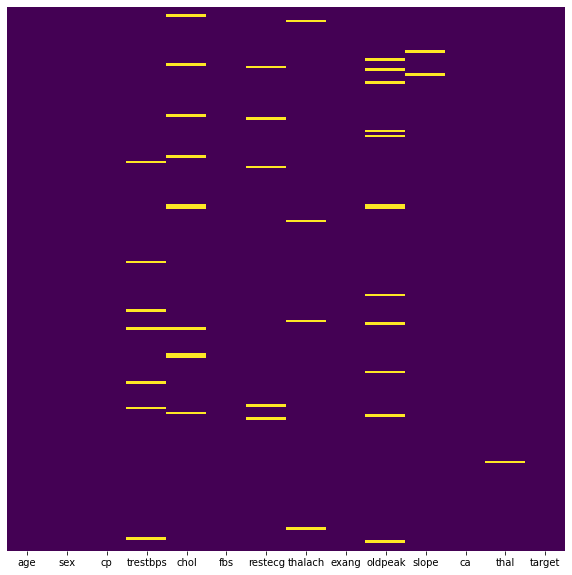

In [10]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df2.isnull(),yticklabels=False,cbar=False,cmap='viridis',ax=ax);

In [11]:
df_p_n = df2[['age','trestbps','oldpeak','chol','thalach']]
df_p_n1 =df_p_n.fillna(df_p_n.median())

df_p_c = df2[['cp','restecg','slope','thal','sex','fbs','exang','ca','target']]
df_p_c.mode()

,cp,restecg,slope,thal,sex,fbs,exang,ca,target
0,0,1.0,2.0,2.0,1,0,0,0,1


In [12]:
df_p_c['restecg'].fillna('1.0',inplace = True)
df_p_c['slope'].fillna('2.0',inplace = True)
df_p_c['thal'].fillna('2.0',inplace = True)
df_p_c.isnull().sum()

cp         0
restecg    0
slope      0
thal       0
sex        0
fbs        0
exang      0
ca         0
target     0
dtype: int64

In [13]:
df_f = pd.concat([df_p_n1, df_p_c], axis=1)
df_f['restecg'] = df_f['restecg'].astype(float)
df_f['slope'] = df_f['slope'].astype(float)
df_f['thal'] = df_f['thal'].astype(float)
df_f

,age,trestbps,oldpeak,chol,thalach,cp,restecg,slope,thal,sex,fbs,exang,ca,target
0,76,140.0,1.0,197.0,116.0,2,2.0,1.0,2.0,0,0,0,0,1
1,43,132.0,3.0,341.0,136.0,0,0.0,1.0,3.0,0,1,1,0,0
2,47,108.0,-0.0,243.0,152.0,2,1.0,2.0,2.0,1,0,0,0,0
3,51,100.0,1.0,241.5,143.0,2,1.0,1.0,2.0,1,0,1,0,1
4,57,110.0,3.0,335.0,143.0,0,1.0,1.0,3.0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,56,130.0,1.0,256.0,142.0,2,0.0,1.0,1.0,1,1,1,1,0
208,57,128.0,1.0,303.0,159.0,0,0.0,2.0,2.0,0,0,0,1,1
209,54,150.0,2.0,232.0,165.0,2,0.0,2.0,3.0,1,0,0,0,1
210,41,130.0,2.0,214.0,168.0,2,0.0,1.0,2.0,1,0,0,0,1


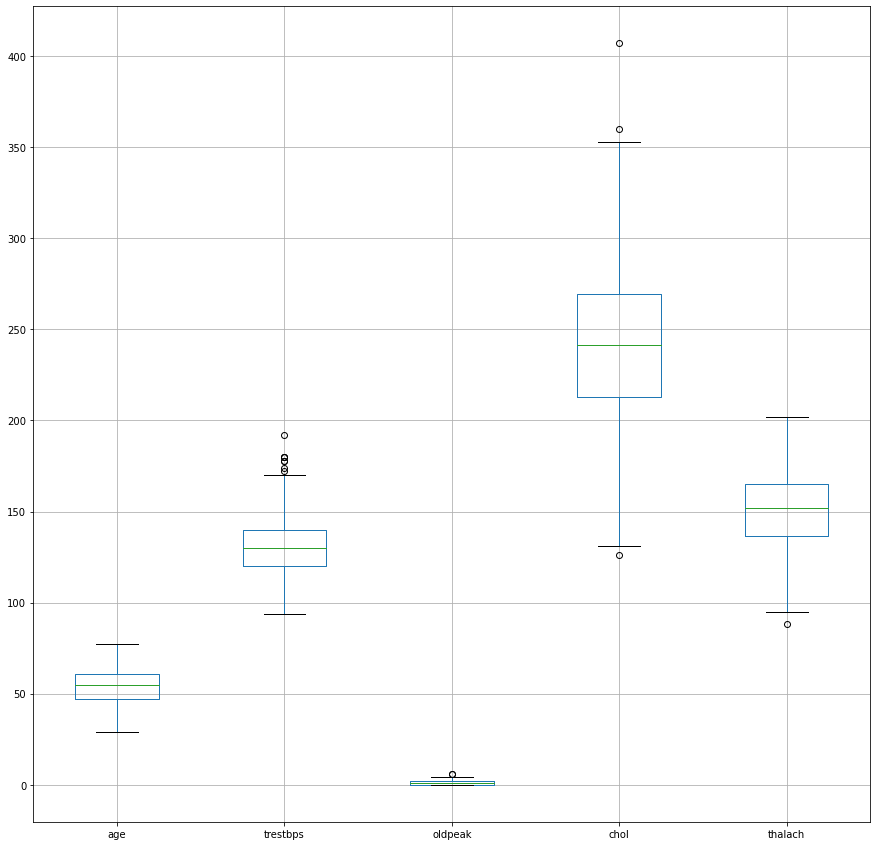

In [14]:
fig, ax = plt.subplots(figsize=(15,15))
df_f.boxplot(column=['age','trestbps','oldpeak','chol','thalach'], ax=ax);

In [15]:
df_f['restecg'] = df_f['restecg'].astype(int)
df_f['slope'] = df_f['slope'].astype(int)
df_f['thal'] = df_f['thal'].astype(int)

dataset = pd.get_dummies(df_f, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])
dataset

,age,trestbps,oldpeak,chol,thalach,target,sex_0,sex_1,cp_0,cp_1,...,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,76,140.0,1.0,197.0,116.0,1,1,0,0,0,...,1,0,1,0,0,0,0,0,1,0
1,43,132.0,3.0,341.0,136.0,0,1,0,1,0,...,1,0,1,0,0,0,0,0,0,1
2,47,108.0,-0.0,243.0,152.0,0,0,1,0,0,...,0,1,1,0,0,0,0,0,1,0
3,51,100.0,1.0,241.5,143.0,1,0,1,0,0,...,1,0,1,0,0,0,0,0,1,0
4,57,110.0,3.0,335.0,143.0,0,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,56,130.0,1.0,256.0,142.0,0,0,1,0,0,...,1,0,0,1,0,0,0,1,0,0
208,57,128.0,1.0,303.0,159.0,1,1,0,1,0,...,0,1,0,1,0,0,0,0,1,0
209,54,150.0,2.0,232.0,165.0,1,0,1,0,0,...,0,1,1,0,0,0,0,0,0,1
210,41,130.0,2.0,214.0,168.0,1,0,1,0,0,...,1,0,1,0,0,0,0,0,1,0


In [16]:
#Dividiing each dataset into features(X) and target(Y)
target=["target"]
cols=[col for col in dataset.columns if col not in target]

x=dataset[cols]
y=dataset[target]
dataset1=dataset.copy()
scaling = MinMaxScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset1[columns_to_scale] = scaling.fit_transform(dataset1[columns_to_scale])
dataset2 = dataset1.drop('target',axis=1)

#Splitting the data
x_train, x_val, y_train, y_val = train_test_split(dataset2, y, test_size=0.2, random_state=275)

#Training the model on train data
Knc=KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto',leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
#Fitting the classifier to data
Knc.fit(x_train,y_train)

KNeighborsClassifier()

In [17]:
#Finding best value of K
k_value = [1,5,7,9,10,15,20,25,30,35]
result_list = []
for k in k_value:
    n=KNeighborsClassifier(n_neighbors=k)
    n.fit(x_train,y_train)
    y=n.predict(x_val)
    result = round(metrics.accuracy_score(y_val,y),2)
    result_list.append(result)
df= pd.DataFrame(result_list,k_value,columns = ['Accuracy scores on Val data'])
df

,Accuracy scores on Val data
1,0.86
5,0.81
7,0.86
9,0.86
10,0.86
15,0.86
20,0.86
25,0.86
30,0.86
35,0.86


In [18]:
heart_t = pd.read_csv("C:\\Users\\mps\\OneDrive - University of Waterloo\\Documents\\Assignment 657\\Heart\\Kaggle Heart\\test.csv")
heart_t2 = heart_t.drop('id',axis=1)
heart_t2 = pd.get_dummies(heart_t2, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])
scaling = MinMaxScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
heart_t2[columns_to_scale] = scaling.fit_transform(heart_t2[columns_to_scale])

In [19]:
#Training the model on train data
Knc=KNeighborsClassifier(n_neighbors=10, weights='uniform', algorithm='auto',leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
#Fitting the classifier to data
Knc.fit(x_train,y_train)
y = Knc.predict(heart_t2)
y4 =pd.DataFrame(y,columns=['target'])
heart_t1 =pd.DataFrame(heart_t['id'],columns=['id'])
y_final = pd.concat([heart_t1, y4], axis=1)


In [20]:
y_final.to_csv(r'C:\\Users\\mps\\OneDrive - University of Waterloo\\Documents\\Assignment 657\\Heart\\Output Heart\\Test_10N.csv',index=False)